In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L_energy = [0.75,0.80248,0.85820,0.91708,0.97923,1.04473,1.11367,1.18614,1.26220,1.34194,1.42543,1.51274,1.60393,1.69909,1.79826,1.90152,2.00894,2.12059,2.23463,2.34869,2.46703,2.58974,
         2.71694,2.84871,2.98516,3.12638,3.27246,3.42351,3.57961,3.74088,3.90739,4.07926,4.25658,4.43944,4.62794,4.82218,5.02226,5.22828,5.44033,5.65853,5.88298,6.11377,6.35103,6.59485,
          6.84536,7.10267,7.36691,7.63820,7.91667,8.20247,8.49573,8.79662,9.10529,9.42192,9.74669,10.07979,10.421,
         10.421,10.74471,11.07302,11.40634,11.74462,12.08784,12.43599,12.78901,13.14690,13.50961,13.87711,14.24937,14.62636,15.00804,15.39438,15.78543,16.18108,16.58129,16.98602,
         17.39523,17.80889,18.22695,18.64938,19.07613,19.50717,19.94245,20.38194,20.82560,21.27338,21.72524,22.18114,22.64105,23.10491,23.57269,24.04435,24.51984,24.99913,25.48217,
          25.96892,26.45935,26.95341,27.45106,27.95227,28.45698,28.96518,29.47681,29.99183,30.51022,31.55691,32.08515,32.61660,33.15123,33.6889,34.22986,34.77380,35.32078,35.87076,
          36.42371,36.97961,37.53840,
          37.53840,38.28487,39.03687,39.79378,40.55553,41.32205,42.09325,42.8697,43.64943,44.43426,45.22349,46.01705,46.81486,
          47.61686,48.42296,49.23311,50.04724,50.86526,51.68712,52.51275,53.34207,54.17503,55.01154,55.85156,56.69500,57.54181,
         58.39192,59.24526,60.10178,60.96140,61.82407,62.68972,63.55829,64.42972,65.30395,66.18092,
          66.18092,67.06008,67.94235,68.82717,69.71449,70.60426,71.49642,72.3909,73.28766,74.18664,75.08779,75.99105,76.89636,77.80368,78.71294,79.62411,80.53713,
         81.45194,82.36849,83.28675,84.20665,85.12814,86.05119,86.97574,87.90175,88.82917,89.75794,90.68804,91.61940,92.55200,
          92.552,93.53635,94.52273,95.51059,96.49991,97.49065,98.48278,99.47627,100.47109,101.46721,102.46459,103.46321,104.46303,105.46403,
          106.46618,107.46944,108.47379,109.47919,110.48563,111.49307,112.50148,113.51084,114.52111,115.53228,116.54431
         ]

In [3]:
H_energy = [116.54431,125.1,133.8,142.8,152.1,161.2,170.6,180.2,190.0,199.7,209.5,219.5,229.8,239.9,250.1,260.5,271.1,281.5,292.1,302.8,313.8,324.4,335.2,346.1,357.1,368.1,379.1,390.2,401.5]

In [4]:
df_L = pd.DataFrame(L_energy)
df_L.columns =['Energy_cell']
df_L['Energy_cell']=df_L['Energy_cell']*1e6
df_L.head

<bound method NDFrame.head of      Energy_cell
0       750000.0
1       802480.0
2       858200.0
3       917080.0
4       979230.0
..           ...
203  112501480.0
204  113510840.0
205  114521110.0
206  115532280.0
207  116544310.0

[208 rows x 1 columns]>

In [5]:
differences = []
for i in range(len(L_energy) - 1):
    differences.append(L_energy[i+1] - L_energy[i])
differences.append(0)
df_L["delE"]=differences
df_L["delE"]=df_L["delE"]*1e6

In [6]:
syn_pha=-32/180*np.pi
df_L["V"] = df_L["delE"]/np.cos(syn_pha)

In [7]:
rf_freq_L=201.25e6
rf_freq_H=805e6
proton_mass=938272088.16
electron_mass=510998.95
pmass= proton_mass+2*electron_mass
light_v=299792458


df_L["Gamma"] = (df_L["Energy_cell"]+pmass)/pmass
df_L['Beta']=np.sqrt(1-1/df_L['Gamma']/df_L['Gamma'])
df_L['L']=df_L['Beta']*light_v/rf_freq_L    ##2pi-mode cavity
#df.loc[56,'L']=float(df.loc[55,'L'])



df_L.head(6)

,Energy_cell,delE,V,Gamma,Beta,L
0,750000.0,52480.0,61883.282608,1.000798,0.039938,0.059494
1,802480.0,55720.0,65703.820635,1.000854,0.041310,0.061537
2,858200.0,58880.0,69430.024390,1.000914,0.042718,0.063635
3,917080.0,62150.0,73285.937769,1.000976,0.044157,0.065779
4,979230.0,65500.0,77236.185420,1.001043,0.045627,0.067968
5,1044730.0,68940.0,81292.559128,1.001112,0.047125,0.070200


In [8]:
interpolated = []
for i in range(len(H_energy) - 1):
    increment = (H_energy[i+1] - H_energy[i]) / 16
    for j in range(16):
        interpolated.append(H_energy[i] + j * increment)
interpolated.append(H_energy[-1])
print(len(interpolated))

449


In [9]:

# Calling DataFrame constructor on list
df_H = pd.DataFrame(interpolated)
df_H.columns =['Energy_cell']
df_H['Energy_cell']=df_H['Energy_cell']*1e6


In [10]:
differences = []
for i in range(len(interpolated) - 1):
    differences.append(interpolated[i+1] - interpolated[i])
differences.append(0)
df_H["delE"]=differences
df_H["delE"]=df_H["delE"]*1e6
df_H["V"] = df_H["delE"]/np.cos(syn_pha)
print(syn_pha)

-0.5585053606381855


In [11]:


df_H["Gamma"] = (df_H["Energy_cell"]+pmass)/pmass
df_H['Beta']=np.sqrt(1-1/df_H['Gamma']/df_H['Gamma'])
df_H['L']=df_H['Beta']*light_v/rf_freq_H/2    ##pimode cavity


#df.loc[1.5]=df.loc[1]
#df = df.sort_index().reset_index(drop=True)

for i in range(1,28):
    n=i*16-1
    df_H.loc[n+0.5]=df_H.loc[n+1]
    df_H.loc[n+0.5,'V']=0
    df_H.loc[n+0.5,'delE']=0
    df_H.loc[n+0.5,'L']=float(df_H.loc[n+0.5,'L']*4)
df_H = df_H.sort_index().reset_index(drop=True)
    
#    df1=df1.appenddf1,

df_H.head(40)

,Energy_cell,delE,V,Gamma,Beta,L
0,1.165443e+08,534730.625,630542.804616,1.124076,0.456703,0.085041
1,1.170790e+08,534730.625,630542.804616,1.124646,0.457579,0.085204
2,1.176138e+08,534730.625,630542.804616,1.125215,0.458452,0.085367
3,1.181485e+08,534730.625,630542.804616,1.125784,0.459322,0.085529
4,1.186832e+08,534730.625,630542.804616,1.126354,0.460190,0.085690
5,1.192180e+08,534730.625,630542.804616,1.126923,0.461054,0.085851
6,1.197527e+08,534730.625,630542.804616,1.127492,0.461915,0.086012
7,1.202874e+08,534730.625,630542.804616,1.128062,0.462774,0.086171
8,1.208222e+08,534730.625,630542.804616,1.128631,0.463629,0.086331
9,1.213569e+08,534730.625,630542.804616,1.129200,0.464482,0.086490


In [12]:
df=pd.concat([df_L,df_H])
df = df.reset_index(drop=True)

In [19]:
df.iloc[90:120,:]

,Energy_cell,delE,V,Gamma,Beta,L
90,23572690.0,471660.0,5.561713e+05,1.025096,0.219919,0.327602
91,24044350.0,475490.0,5.606875e+05,1.025598,0.222027,0.330742
92,24519840.0,479290.0,5.651684e+05,1.026105,0.224129,0.333874
93,24999130.0,483040.0,5.695903e+05,1.026615,0.226225,0.336996
94,25482170.0,486750.0,5.739651e+05,1.027129,0.228314,0.340109
95,25968920.0,490430.0,5.783045e+05,1.027647,0.230398,0.343212
96,26459350.0,494060.0,5.825849e+05,1.028169,0.232475,0.346307
97,26953410.0,497650.0,5.868181e+05,1.028695,0.234546,0.349392
98,27451060.0,501210.0,5.910160e+05,1.029225,0.236610,0.352467
99,27952270.0,504710.0,5.951431e+05,1.029759,0.238668,0.355532


0 0.05949352360660638 61883.28260844279
1 0.12103075986815959 65703.820635336
2 0.18466572810087445 69430.0243899603
3 0.25044435329166176 73285.93776895433
4 0.3184119650013675 77236.18542021718
5 0.38861227055964415 81292.55912778292
6 0.46108779313746756 85455.05889165116
7 0.5358799359859562 89688.30935972107
8 0.6130281280211537 94027.68588409349
9 0.6925708790394854 98449.6048967015
10 0.7745452519521779 102954.06639754464
11 0.8589869736259366 107529.2786025897
12 0.9459302652659658 112210.616863937
13 1.0354087526432176 116939.12226141909
14 1.1274542119224957 121761.96193117023
15 1.2220977245121987 126667.34408915623
16 1.3193694734495205 131655.2687353781
17 1.419298804001923 134473.50511941366
18 1.5218706086862002 134497.08868748051
19 1.6270180219592085 139543.97225387036
20 1.734771685435085 144696.98187656296
21 1.845161878370633 149991.49290765892
22 1.9582191418821193 155380.3382110234
23 2.073973414131469 160898.89313875802
24 2.192454648319125 166523.5741227954
25 2

499 112.64074801305966 781205.6922274156
500 112.75996779932792 781205.6922273487
501 112.87928045266754 781205.6922274156
502 112.998685750286 781205.6922274156
503 113.1181834702344 781205.6922273487
504 113.23777339140271 781205.6922274156
505 113.35745529351514 781205.6922274156
506 113.47722895712542 781205.6922273487
507 113.59709416361221 781205.6922274156
508 113.71705069517454 781205.6922274156
509 113.83709833482722 781205.6922273487
510 113.95723686639637 781205.6922274156
511 114.07746607451492 781205.6922273487
512 114.19778574461816 781205.6922274156
513 114.67942541790302 0.0
514 114.79983533622423 788575.5572483885
515 114.92033613816783 788575.5572483885
516 115.04092760753511 788575.5572484557
517 115.16160952893468 788575.5572483885
518 115.28238168777801 788575.5572483885
519 115.40324387027503 788575.5572483885
520 115.52419586342974 788575.5572483885
521 115.64523745503587 788575.5572484557
522 115.76636843367261 788575.5572483885
523 115.8875885887003 788575.5572

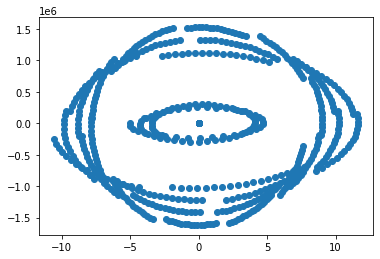

In [32]:
particles = []

for i in range(0,16):
    particles.append(0)
    
df_part=pd.DataFrame(particles)




init_phase=-32.0
synch_phase=-32.0
light_v=299792458
T_synch=0
synch_energy=0.75e6
init_freq = 201.25e6
init_energy=0.75e6
energy=init_energy+0.000e6
T=(init_phase - synch_phase)/360.0/init_freq

total_length = 0

x = []
y = []
l = []
for turn in range (0,683):
    voltage=df.iloc[turn,df.columns.get_indexer(['V'])].values[0]
    length=df.iloc[turn,df.columns.get_indexer(['L'])].values[0]
    gamma=(pmass+energy)/pmass
    beta=np.sqrt(1-1/gamma/gamma)

    if turn==116:
        T= T - 5./360.0/rf_freq_L 
    #if turn==182:
    #    T= T - 2./360.0/rf_freq_L    
    
    if turn < 208:
        if voltage==0:
            T_synch = T_synch + 1/rf_freq_L
        else:
            T_synch = T_synch + 1/rf_freq_L
            
    else:
        if voltage==0:
            T_synch = T_synch + 2.0*(1/rf_freq_H)
        else:
            T_synch = T_synch + 0.5*(1/rf_freq_H)

#    if turn == 56:
#         T_synch=T_synch
#    elif turn == 56+59+1:
#        T_synch=T_synch

      
    T=T+length/(beta*light_v)
    
    if turn < 208:
        del_phase =(T-T_synch)*rf_freq_L*2*np.pi
    elif turn == 208:
        del_phase =(T-T_synch)*rf_freq_L*2*np.pi*4
    else:
        del_phase =(T-T_synch)*rf_freq_H*2*np.pi
    energy = energy + voltage*np.cos((synch_phase/180*np.pi)+del_phase)
    synch_energy = synch_energy + voltage*np.cos((synch_phase)/180*np.pi)
    #synch_energy=df.iloc[turn+1,df.columns.get_indexer(['Energy_cell'])].values[0]
    del_energy=energy-synch_energy
    del_phase_deg=del_phase*180/np.pi
    total_length=total_length+length
    #if turn>200 and turn<220:
    #if voltage == 0:
    print(turn,total_length,voltage)
    x.append(del_phase_deg)
    y.append(del_energy)
    l.append(total_length)
    #ene.append(synch_energy)
    
    

plt.scatter(x,y)
plt.show()

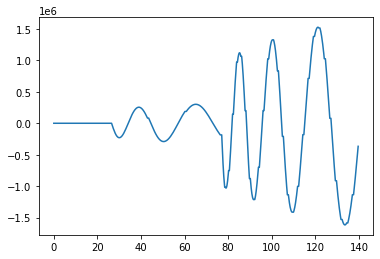

In [33]:
plt.plot(l,y)
plt.show()

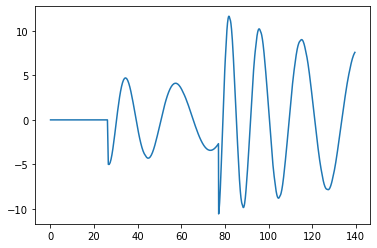

In [34]:
plt.plot(l,x)
plt.show()


<Figure size 864x360 with 0 Axes>

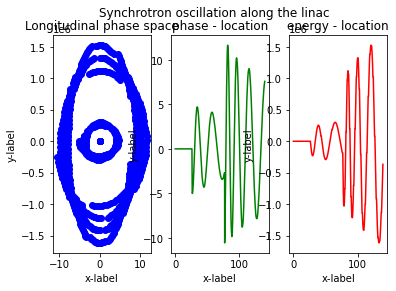

In [36]:
fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Synchrotron oscillation along the linac')
ax1.scatter(x, y, color = 'blue')
ax1.set_title('Longitudinal phase space')
ax1.set(xlabel='x-label', ylabel='y-label')
ax2.plot(l, x, color = 'green')
ax2.set_title('phase - location')
ax2.set(xlabel='x-label', ylabel='y-label')
ax3.plot(l, y, color = 'red')
ax3.set_title('energy - location')
ax3.set(xlabel='x-label', ylabel='y-label')







plt.savefig('oscillation.png')



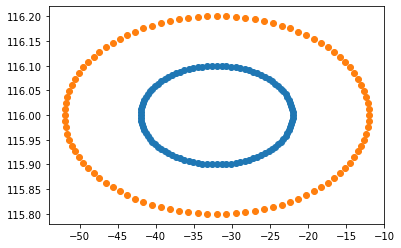

In [1196]:

import numpy as np
import matplotlib.pyplot as plt

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles


initE = 116 #MeV                                                                                                                                          
initPhi = -32 #deg                                                                                                                                        

r = [10,20] #delta phi in degrees, can take multiple entries                                                                                              
rE = [0.1, 0.2] #delta E in MeV, can take multiple                                                                                                        
n = [100,100] # number of particles on circle, can take multiple                                                                                          

circles = circle_points(r, n)
fig, ax = plt.subplots()

for i,circle in enumerate(circles):
    enes = np.add(circle[:,1]/(r[i]/rE[i]),initE)
    phases = np.add(circle[:,0],initPhi)

    ax.scatter(phases,enes)
plt.show()